In [2]:
%pylab inline
import pandas as pd
import numpy as np
import os
from customTypes import ThreadType
import thermocouple

Populating the interactive namespace from numpy and matplotlib


In [3]:
d=os.path.expanduser("~")
d=os.path.join(d,"Desktop", "Data")

In [4]:
temp_dir = os.path.join(d, "Temperature")
pres1_dir = os.path.join(d, "Pressure1")
pres2_dir = os.path.join(d, "Pressure2")

In [5]:
a = os.listdir(temp_dir)
sorted(a)

['out_20191226185147.csv',
 'out_20191226190613.csv',
 'out_20191226194414.csv',
 'out_20191226203247.csv',
 'out_20191226203406.csv',
 'out_20191226203635.csv',
 'out_20191226203904.csv',
 'out_20191226203956.csv',
 'out_20191226204323.csv',
 'out_20191226204409.csv',
 'out_20191226204700.csv',
 'out_20191226205109.csv',
 'out_20191226214146.csv',
 'out_20191226214259.csv',
 'out_20191226215126.csv',
 'out_20191226215404.csv',
 'out_20191226215444.csv',
 'out_20191226215613.csv',
 'out_20191226215717.csv',
 'out_20191227115102.csv',
 'out_20191227115701.csv',
 'out_20191227115914.csv',
 'out_20191227153958.csv',
 'out_20191227154043.csv',
 'out_20191227154335.csv',
 'out_20191227155806.csv',
 'out_20191227161242.csv',
 'out_20191227161918.csv',
 'out_20191227162720.csv',
 'out_20191227162916.csv',
 'out_20191227163243.csv',
 'out_20191227174945.csv',
 'out_20191227202006.csv',
 'out_20191227202034.csv',
 'out_20191227202138.csv']

In [6]:
datetime = "20191227202138"
filename = "out_" + datetime + ".csv"
filename

'out_20191227202138.csv'

In [7]:
""" smoothing savitzky_golay """
# https://plot.ly/python/smoothing/
def savitzky_golay(y, window_size, order):
    ''' smoothing '''
    import numpy as np
    from math import factorial
    from scipy.signal import savgol_filter
    
    try:
        window_size = np.abs(np.int(window_size))
        order = np.abs(np.int(order))
    except ValueError:
        raise ValueError("window_size and order have to be of type int")
    if window_size % 2 != 1 or window_size < 1:
        window_size += 1
    return savgol_filter(y,window_size,order)

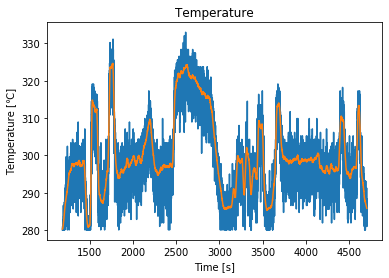

In [7]:
""" temperature """
temp_csv = pd.read_csv(temp_dir + "/" + filename)
plt.title("Temperature")
plt.xlabel("Time [s]")
plt.ylabel("Temperature [℃]")
xy = ThreadType.TEMPERATURE.getCalcArray(np.array(temp_csv))

mask = np.where(xy[:,1] > 280)
xy = xy[mask]

plt.plot(xy[:, 0], xy[:, 1])
xy[:, 1] = savitzky_golay(xy[:, 1], 200, 2)

plt.plot(xy[:, 0], xy[:, 1])

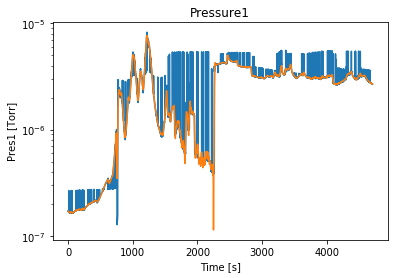

In [26]:
""" pressure1 """
pres1_csv = pd.read_csv(pres1_dir + "/" + filename)
plt.title("Pressure1")
plt.xlabel("Time [s]")
plt.ylabel("Pres1 [Torr]")
xy = ThreadType.PRESSURE1.getCalcArray(np.array(pres1_csv))

xy[:, 1] = [i/(pow(10, 6)) for i in xy[:, 1]]
xy[:4594, 1] = [i/10 for i in xy[:4594, 1]]
plt.plot(xy[:, 0], xy[:, 1])
xy[:, 1] = savitzky_golay(xy[:, 1], 200, 2)

plt.plot(xy[:, 0], xy[:, 1])

yscale("log")

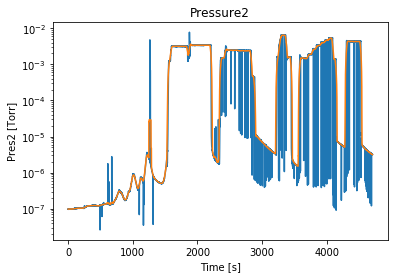

In [20]:
""" pressure2 """
pres2_csv = pd.read_csv(pres2_dir + "/" + filename)
plt.title("Pressure2")
plt.xlabel("Time [s]")
plt.ylabel("Pres2 [Torr]")
xy = ThreadType.PRESSURE2.getCalcArray(np.array(pres2_csv))

plt.plot(xy[:, 0], xy[:, 1])
xy[:, 1] = savitzky_golay(xy[:, 1], 200, 1)

plt.plot(xy[:, 0], xy[:, 1])

yscale("log")